# 奇异值分解

奇异值分解是一类矩阵分解方法，它能够将一个大矩阵转化成几个小矩阵相乘的形式，这些小矩阵中蕴含着大矩阵的很多重要特征。正如我们要记住一张陌生的脸总是先记住这张脸的种种特征一样，奇异值分解能够帮助我们从矩阵中提取特征，而这些特征正是我们“认识”这个矩阵的重要桥梁。在人工智能非常流行的今天，奇异值分解也不仅仅只是一个数学问题，而被更广泛地应用到图片压缩，图片去噪，数据降维，推荐系统等等方面中去。本文将着重介绍奇异值分解的背景知识以及应用。

## 矩阵坐标变换

奇异值分解可以非常简明地使用数学语言描述：

>对于每一个线性映射T: Kn → Km，T把Kn的第i个基向量映射为Km的第i个基向量的非负倍数，然后将余下的基向量映射为零向量。对照这些基向量，映射T就可以表示为一个非负对角阵。

然而这样的概括太过抽象，因此笔者想从比较直观的几何意义来阐明奇异值分解的意义。各位读者可能本科的时候就学过线性代数，线性代数的入门知识就是矩阵乘法，那时候老师只会告诉我们矩阵的乘法法则，可是矩阵乘法的意义特别是物理意义是什么呢？这一小节笔者将尝试从几何的角度阐述矩阵乘法。

首先用一句话概括矩阵乘法的几何意义：矩阵乘法就是将m空间下的一组坐标映射到n空间下坐标的过程。为了能够直观地观察，这里的空间坐标变换全部都限定为二维平面空间。假定现在平面坐标系上有四个点:

$$
p_{1}=\begin{bmatrix}
0\\0 
\end{bmatrix} 
p_{2}=\begin{bmatrix}
0\\1 
\end{bmatrix} 
p_{3}=\begin{bmatrix}
1\\1
\end{bmatrix} 
p_{4}=\begin{bmatrix}
1\\0 
\end{bmatrix}
$$

在坐标系上这几个点构成的图形如下所示：

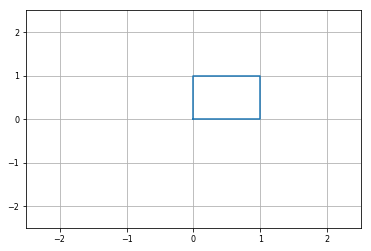

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8

v = np.asmatrix([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], dtype=np.float32)
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(v[:, 0], v[:, 1])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

之所以要使用一个矩形来表示是因为这样能够更清楚地显示出矩阵坐标变换对图形的影响。我们都知道：标准坐标系使用标准正交基向量表示就是x轴和y轴方向上的单位向量。在这里有必要解释一下“正交基向量”这个概念：通常我们表示一个坐标系时是选取该坐标系下的一组正交向量来表示，例如二维坐标系那么选取两个相互正交的向量就能够表示，如果是三维坐标系就需要用三个相互正交的向量来表示。而且为了表示方便，通常情况下正交的基向量是单位向量。当然，使用非单位正交向量也能够表示一个坐标系。上图所示的标准坐标系使用标准正交基向量表示就是：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
1 & 0\\ 
0 & 1
\end{bmatrix}
$$

可以看到以上向量两两正交且向量的模为1，则一个点在基向量上的投影可以表示为：

$$p_{i} = W^{T}p_{i}$$

上面的四个点构成的向量集合可以表示为：

$$P=(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}$$

则四个点在两个正交坐标基向量上的投影为：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
1 & 0\\ 
0 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}$$

可以看到，经过标准坐标系的正交基向量的变换（投影），原坐标系上的四个点都没有发生变化，这是当然的，因为这四个点原本就是在标准坐标系下的点。现在我们将这四个点投影到另一个坐标系中。现在设定新坐标系的正交向量为：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
2 & 0\\ 
0 & 1
\end{bmatrix}$$

上面正交向量的表示其x轴上的“单位”向量长度是标准坐标系下基向量长度的2倍，可以预见，通过这个坐标系的变换，原有的矩形会在x轴方向上拉长2倍：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
2 & 0\\ 
0 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0&  2& 2\\ 
0 &  1&  0& 1
\end{bmatrix}$$

直观的形象如下图所示：

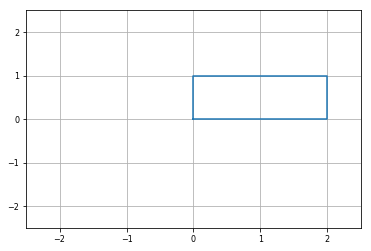

In [7]:
v = np.asmatrix([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], dtype=np.float32)
W = np.asmatrix([[2, 0], [0, 1]], dtype=np.float32)
v1 = (W * v.T).T
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(v1[:, 0], v1[:, 1])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

从上面的例子可以总结出一些规律：变换坐标系正交向量的模决定向量变换后的模，如果正交向量的模大于1则会拉长向量，如果小于1则会缩小向量；而正交向量和原坐标系正交基向量的角度决定了向量变换后的旋转角度，由于上面两个例子中变换坐标系的正交向量与原坐标系的正交基向量是平行的，因此变换后的图形只是在大小上发生了变化而并没有产生旋转。接下来，我们可以做一些复杂的变换，现有新的变换坐标系向量：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
2 & 0.3\\ 
1 & 1
\end{bmatrix}$$

上述向量组不但会在长度上拉伸原向量，也会使原向量产生一定的旋转，直观上看会使向量朝着逆时针旋转一定的角度：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
2 & 1\\ 
0.3 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  1&  2& 3\\ 
0 &  1&  0.3& 1.3
\end{bmatrix}$$

在坐标系中的表示如下图所示：

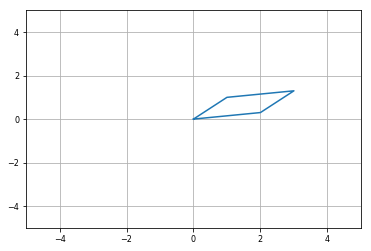

In [9]:
v = np.asmatrix([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], dtype=np.float32)
W = np.asmatrix([[2, 1], [0.3, 1]], dtype=np.float32)
v1 = (W * v.T).T
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(v1[:, 0], v1[:, 1])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

最后，我们来做一个特殊一些的变换：将这个矩形旋转一定的角度但却不改变其形状。通过上面的例子可以知道，要达到这个目的必须使变换坐标系的两个向量正交且保证其为单位向量，这样就不会改变原来矩形的形状和大小。而因为有旋转要求，因此新的坐标系必须和原坐标系有一定的角度：也就是说新坐标系的正交基向量与原坐标系的正交基向量必须成一定的角度。根据三角函数的相关知识，我们可以非常轻松地写出这两个新坐标系的正交基向量：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
cos\theta & -sin\theta\\ 
sin \theta & cos\theta
\end{bmatrix}$$

假如我们想让矩形旋转60度，则可以写出这个矩阵：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
0.5 & -0.866\\ 
0.866 & 0.5
\end{bmatrix}$$

变换后的向量组为：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
0.5 & 0.866\\ 
-0.866 & 0.5
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0.866&  0.5& 1.366\\ 
0 &  0.5&  -0.866& -0.366
\end{bmatrix}$$

变换后的图形为：

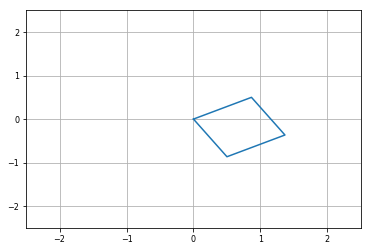

In [10]:
v = np.asmatrix([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], dtype=np.float32)
W = np.asmatrix([[0.5, 0.866], [-0.866, 0.5]], dtype=np.float32)
v1 = (W * v.T).T
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(v1[:, 0], v1[:, 1])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

## 矩阵的特征值

矩阵的奇异值分解和方阵的特征值分解非常相似，因此在介绍奇异值分解之前先说一下方阵的特征值及其特征矩阵。现有n阶方阵A，若该方阵满足如下条件：

$$Aw_{1}=\lambda_{1}w_{1}$$

我们就说$\lambda_{1}$和$x_{1}$分别是方阵A的特征值和特征向量。一个方阵通常会有m个特征值和特征向量，可以写成如下形式：

$$\begin{matrix}
Aw_{1}=\lambda_{1}w_{1}\\
Aw_{2}=\lambda_{1}w_{2}\\
...\\
Aw_{m}=\lambda_{1}w_{m}
\end{matrix} \rightarrow A[w_{1},w_{2},...,w_{m}]=[w_{1},w_{2},...,w_{m}]\begin{bmatrix}\lambda_{1} & ... & 0\\
0&\lambda_{i}&0\\0&...&\lambda_{m}\end{bmatrix} \rightarrow
AU=U\Lambda \rightarrow
A=U\Lambda U^{-1}$$

从特征值和特征矩阵的解析表达式上可以看出，特征值和特征矩阵的几何意义在于：m维空间中存在这样一组向量，这组向量经过一个m维坐标系变换后得到的向量组中的向量和原向量组对应向量同方向但长度相差一个系数，该系数就是其对应的特征值。其几何意义如下图所示：

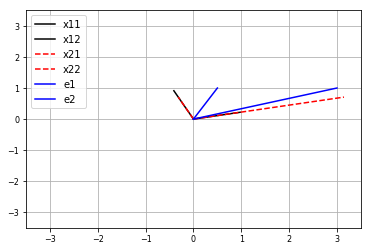

In [19]:
A = np.asmatrix([[3, 1], [0.5, 1]], dtype=np.float32)
eigvalue, eigvector = np.linalg.eig(A)
v1 = A * eigvector
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot([0, eigvector[0, 0]], [0, eigvector[1, 0]], color="black", label="x11")
ax.plot([0, eigvector[0, 1]], [0, eigvector[1, 1]], color="black", label="x12")
ax.plot([0, v1[0, 0]], [0, v1[1, 0]], color="red", linestyle="--", label="x21")
ax.plot([0, v1[0, 1]], [0, v1[1, 1]], color="red", linestyle="--", label="x22")
ax.plot([0, A[0, 0]], [0, A[0, 1]], color="blue", label="e1")
ax.plot([0, A[1, 0]], [0, A[1, 1]], color="blue", label="e2")
ax.legend()
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.show()

如上图所示：标准坐标系K1中有两个向量e1和e2，这两个向量用以描述一个新的二维空间记做K2，那么原坐标系K1中存在这样的一组向量x11和x12，他们在投射到新坐标系K2后形成新的向量组。在K2坐标系下新的向量组记为x21和x22，则x11与x21同方向且向量的模之比为对应特征值，向量x12与x22同方向且向量的模之比为对应特征值。

了解了特征值的几何意义之后我们可以将方阵的特征值特征矩阵相乘的形式展开（注：为了表示方便我们假定矩阵A为对称方阵，那么其特征向量两两正交且模为1，则其特征矩阵的逆矩阵就是其自身的转置）：

$$A=[w_{1},w_{2},...,w_{m}]
\begin{bmatrix}
\lambda_{1} & ... & 0\\
0&\lambda_{i}&0\\
0&...&\lambda_{m}
\end{bmatrix}
\begin{bmatrix}
w_{1}^{T}\\
w_{2}^{T}\\
...\\
w_{m}^{T}
\end{bmatrix}=[w_{1},w_{2},...,w_{m}]
\begin{bmatrix}
\lambda_{1}w_{1}^{T}\\
\lambda_{2}w_{2}^{T}\\
...\\
\lambda_{m}w_{m}^{T}
\end{bmatrix}=\lambda_{1}w_{1}w_{1}^{T} + \lambda_{2}w_{2}w_{2}^{T} + ... + \lambda_{m}w_{m}w_{m}^{T}
$$

虽然上面的矩阵A为了方便加了比较强的限定条件（方阵且对称），但是其得到的结论却是可以推广的：一个方阵通过特征值分解的方式可以转化为多个特征值特征向量相乘再加和的形式。在方阵的特征值分解过程中，特征值数值上最大的几项往往占据了全部特征值和的很大一部分，因此上述等式最右边的部分只用挑特征值最大的几项相加就足以表征出原矩阵的大部分特征，这也是矩阵压缩的理论基础之一。

## 奇异值分解

上面的特征值分解仅仅适用于方阵，对于占矩阵绝大多数的非方阵而言是没有办法应用的。因此在这里就引出了奇异值分解。首先，我们的目标是将矩阵A分解成如下小矩阵相乘的形式：

$$A_{m \times n}=U \Sigma V^{T}$$

虽然矩阵A并不是方阵，不能进行特征值分解，但是我们可以对原矩阵进行一定的转换使其变成一个方阵：

$$AA^{T}u_{i}=\lambda_{i} u_{i} \rightarrow AA^{T}U=U\Lambda $$ 

其中的U矩阵就是奇异值分解中的左奇异U矩阵，为什么这么说呢？其实这可以非常容易的证明：

$$AA^{T}=U\Sigma V^{T}V\Sigma U^{T}=U\Sigma^{2} U^{T} \rightarrow AA^{T}U = U\Sigma^{2}$$

上述证明也直接给出了奇异值对角矩阵和特征值矩阵的关系：

$$\Sigma = \sqrt{\Lambda}$$

同理：

$$A^{T}Av_{i}=\lambda_{i} v_{i} \rightarrow A^{T}AV=V\Lambda $$ 

这里的V就是奇异值分解中的右奇异矩阵，证明方法和左奇异矩阵的证明方法是相同的。综上，我们就可以计算出一个非方阵的奇异值分解。奇异值分解可以很好地将一个矩阵的特征描述出来，正因为有这样的特性所以其用途之一就是对图像进行特征提取进而进行压缩。奇异值分解用于对图像的压缩的原理是：通过奇异值分解提取出图像的主要特征（这一点是依靠奇异值大小来完成的，通常奇异值越大其对应的图像特征就越主要），我们通常只需要利用图像的几个主要特征就能够还原一张图片的主要内容，当然，这样的压缩是有损的。

$$A_{m \times n}=U_{m\times m} \Sigma_{m\times n} V^{T}_{n\times n} \approx U_{m\times k} \Sigma_{k\times k} V^{T}_{k\times n}$$

接下来，笔者将通过一个例子来说明奇异值分解在图像压缩方面的应用。假定我们要进行压缩的图片如下所示：

![](https://upload-images.jianshu.io/upload_images/8762099-0933fc4d649b8349.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/960)

由于这是一张三通道图片，因此不能直接对其进行奇异值分解。首先要做的是将三个通道的图像分开，然后分别进行奇异值分解，最后将压缩后的三个通道再重叠在一起就能还原出一幅彩色图片。整个程序非常简单：

```python
def img(img_path, k):
    img = cv2.imread(img_path)
    height = img.shape[0]
    width = img.shape[1]
    r = np.asmatrix(img[:, :, 0], dtype=np.float32)
    g = np.asmatrix(img[:, :, 1], dtype=np.float32)
    b = np.asmatrix(img[:, :, 2], dtype=np.float32)
    U1, sigma1, V1T = np.linalg.svd(r)
    sigma1 = sigma1[0: k]
    U2, sigma2, V2T = np.linalg.svd(g)
    sigma2 = sigma2[0: k]
    U3, sigma3, V3T = np.linalg.svd(b)
    sigma3 = sigma3[0: k]
    sigma1 = np.hstack(
        (np.vstack((np.diag(sigma1), np.zeros(shape=(height - k, k)))), np.zeros(shape=(height, width - k))))
    sigma2 = np.hstack(
        (np.vstack((np.diag(sigma2), np.zeros(shape=(height - k, k)))), np.zeros(shape=(height, width - k))))
    sigma3 = np.hstack(
        (np.vstack((np.diag(sigma3), np.zeros(shape=(height - k, k)))), np.zeros(shape=(height, width - k))))
    channel_1 = np.asmatrix(U1 * sigma1 * V1T, dtype=np.uint8)
    channel_2 = np.asmatrix(U2 * sigma2 * V2T, dtype=np.uint8)
    channel_3 = np.asmatrix(U3 * sigma3 * V3T, dtype=np.uint8)
    img = cv2.merge([channel_1, channel_2, channel_3])
    cv2.imshow("test", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
```

现在先来测试比较极端的情况：只取第一个奇异值，剩余的全部置0。这种情况下，图片压缩后的效果为：

![](https://upload-images.jianshu.io/upload_images/8762099-5e47c851044bdce9.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/960)

可以看到只选取一个奇异值整个图片非常模糊，只能看出图片的大致结构和色调。现在我们选取前5个奇异值得到的效果如下：

![](https://upload-images.jianshu.io/upload_images/8762099-76361f38c05502e4.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/960)

选取前50个奇异值得到的结果如下：

![](https://upload-images.jianshu.io/upload_images/8762099-e45e7588e959d83d.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/960)

可以看到，整个图片已经比较清晰了。如果我们不断增加选取的奇异值个数（当然，这里的奇异值是从大到小排过序的）那么获得的图片还原度就越高，当然压缩比例也就会越小。处理之外，奇异值分解还被应用在数据降维等多个方面，在这里就不一一赘述。

2019年5月31日